# Machine Learning Regression Model

In [ ]:
???

Classification Model | Regression Model
-|-
![](src/pred_classification.png) | ![](src/pred_regression.png)

## Load the data

In [1]:
import pandas as pd

df = pd.read_excel('data/INTC_subset_Processed.xlsx', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2020-01-02,60.240002,60.970001,60.220001,60.840000,18056000,-1.231284,DOWN
2020-01-03,59.810001,60.700001,59.810001,60.099998,15293900,-0.283661,DOWN
2020-01-06,59.590000,60.200001,59.330002,59.930000,17755200,-1.696929,DOWN
2020-01-07,59.779999,59.799999,58.889999,58.930000,21876100,0.067833,UP
2020-01-08,58.889999,59.320000,58.520000,58.970001,23133500,0.556489,UP
...,...,...,...,...,...,...,...
2024-09-26,24.280001,24.420000,23.250000,23.920000,95416900,-0.041824,DOWN
2024-09-27,24.160000,24.660000,23.700001,23.910000,85883300,-1.918162,DOWN
2024-09-30,23.740000,23.950001,23.090000,23.459999,66308200,-3.393559,DOWN


## Machine Learning Model

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [2]:
target = df.change_tomorrow
explanatory = df[['Open','High','Low','Close','Volume']]

In [3]:
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2020-01-02,60.240002,60.970001,60.220001,60.840000,18056000,-1.231284,DOWN
2020-01-03,59.810001,60.700001,59.810001,60.099998,15293900,-0.283661,DOWN
2020-01-06,59.590000,60.200001,59.330002,59.930000,17755200,-1.696929,DOWN
2020-01-07,59.779999,59.799999,58.889999,58.930000,21876100,0.067833,UP
2020-01-08,58.889999,59.320000,58.520000,58.970001,23133500,0.556489,UP
...,...,...,...,...,...,...,...
2024-09-26,24.280001,24.420000,23.250000,23.920000,95416900,-0.041824,DOWN
2024-09-27,24.160000,24.660000,23.700001,23.910000,85883300,-1.918162,DOWN
2024-09-30,23.740000,23.950001,23.090000,23.459999,66308200,-3.393559,DOWN


### Compute the model

The following model will predict the **numerical increase** of the stock for the following day.

As the variable we predict is numerical, we talk about regression models. In the previous tutorial, we used a classification model since the variable we predicted was categorical (UP or DOWN).

In [4]:
#This code sets up and trains a Decision Tree Regressor using the explanatory features to predict the target. 

from sklearn.tree import DecisionTreeRegressor  # Import the DecisionTreeRegressor class from the sklearn library

# Create a Decision Tree Regressor model with a maximum tree depth of 15
model_dt = DecisionTreeRegressor(max_depth=15)

# Fit the Decision Tree model to the data, where 'explanatory' is the input feature set
# and 'target' is the output/target variable to predict
model_dt.fit(explanatory, target)


DecisionTreeRegressor(max_depth=15)

### Calculate the predictions

In [5]:
#This code makes predictions using the trained model (model_dt), then creates a DataFrame df_predictions 
# containing both the actual values (change_tomorrow) and the predicted values (prediction). 

# Use the trained Decision Tree model (model_dt) to make predictions on the explanatory variables
y_pred = model_dt.predict(X=explanatory)

# Create a copy of the DataFrame 'df', selecting only the 'change_tomorrow' column,
# and store it in 'df_predictions'
df_predictions = df[['change_tomorrow']].copy()

# Add a new column 'prediction' to 'df_predictions', which contains the predicted values (y_pred)
df_predictions['prediction'] = y_pred

# Display the DataFrame with the actual 'change_tomorrow' values and the predicted values
df_predictions


,change_tomorrow,prediction
Date,,
2020-01-02,-1.231284,-1.019789
2020-01-03,-0.283661,-1.019789
2020-01-06,-1.696929,-1.019789
2020-01-07,0.067833,0.743260
2020-01-08,0.556489,0.320595
...,...,...
2024-09-26,-0.041824,-0.041824
2024-09-27,-1.918162,-1.918162
2024-09-30,-3.393559,-3.393559


### Evaluate the model: compare predictions with the reality

In [6]:
#This code calculates the error (the difference between the actual values and the predicted values), 
# sums up all the errors, and rounds the final result to 2 decimal places.

# Calculate the error by subtracting the predicted values ('prediction') from the actual values ('change_tomorrow')
error = df_predictions.change_tomorrow - df_predictions.prediction

# Sum the errors and round the result to 2 decimal places
error.sum().round(2)


-0.0

In [7]:
#This code computes the squared error (the error raised to the power of 2) for each prediction
# and then sums up all the squared errors. Squaring the errors is useful when 
# calculating metrics like the Mean Squared Error (MSE), as it removes negative signs and 
# penalizes larger errors more significantly.

# Calculate the squared error by raising the error values to the power of 2
error_squared = error**2

# Sum all the squared errors
error_squared.sum()


3015.8147897579342

In [8]:
#This code calculates the Mean Squared Error (MSE), which is the average of the squared differences 
# between the actual and predicted values. MSE is a commonly used metric to evaluate regression models, 
# as it provides a single number that indicates how well the model's predictions match the actual values.

# Calculate the mean of the squared errors
error_squared.mean()


2.5215842723728548

In [9]:
#This code calculates the Mean Squared Error (MSE) and assigns it to the variable error_squared_mean, 
# then prints the value. This variable holds the average squared difference between the predicted and 
# actual values, indicating the overall accuracy of the model.

# Calculate the mean of the squared errors and store it in 'error_squared_mean'
error_squared_mean = error_squared.mean()

# Output the value of 'error_squared_mean'
error_squared_mean


2.5215842723728548

In [10]:
#Explanation:
#The Root Mean Squared Error (RMSE) is the square root of the Mean Squared Error (MSE). 
# It provides a measure of the average magnitude of the error between predicted and actual values, 
# with the same units as the original data.
#RMSE is commonly used as a performance metric for regression models, where lower RMSE values indicate better model accuracy.


import numpy as np  # Import NumPy, a library for numerical operations

# Calculate the Root Mean Squared Error (RMSE) by taking the square root of the mean squared error
rmse = np.sqrt(error_squared_mean)

# Output the value of RMSE
rmse


1.5879497071295599

In [11]:
#Explanation:
#error.std() computes the standard deviation of the error values. The standard deviation measures 
# the amount of variation or dispersion in the error values. A lower standard deviation means the 
# error values are tightly clustered around the mean, indicating that the model's predictions are 
# more consistent. A higher standard deviation indicates more variability in the model's errors.


# Calculate the standard deviation of the error values
error.std()


1.5886139822923229

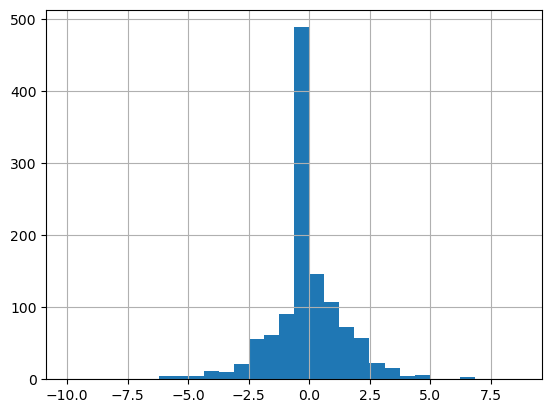

In [12]:
#Explanation:
#This code generates a histogram of the error values using 30 bins to visualize the distribution 
# of the model's prediction errors. A histogram can help you understand the spread, skewness, 
# and whether the errors are normally distributed. If the errors are centered around zero with 
# a bell-shaped curve, it indicates a well-performing model.


# Plot a histogram of the error values with 30 bins
error.hist(bins=30);


The Standard Deviation of the Error|The Normal Distribution
-|-
![](src/std.png) | ![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/1200px-Standard_deviation_diagram.svg.png)

## Save the model into a file

- We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [13]:
import pickle

In [14]:
# Open a file named 'model_dt_regression.pkl' in write-binary mode
with open('models/model_dt_regression.pkl', 'wb') as f:
    # Serialize and save the model 'model_dt' to the specified file
    pickle.dump(model_dt, f)
